In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [58]:
data=pd.read_csv("/content/iris_ebce39dda670dab2577923cdb5a892d6.csv")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [60]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

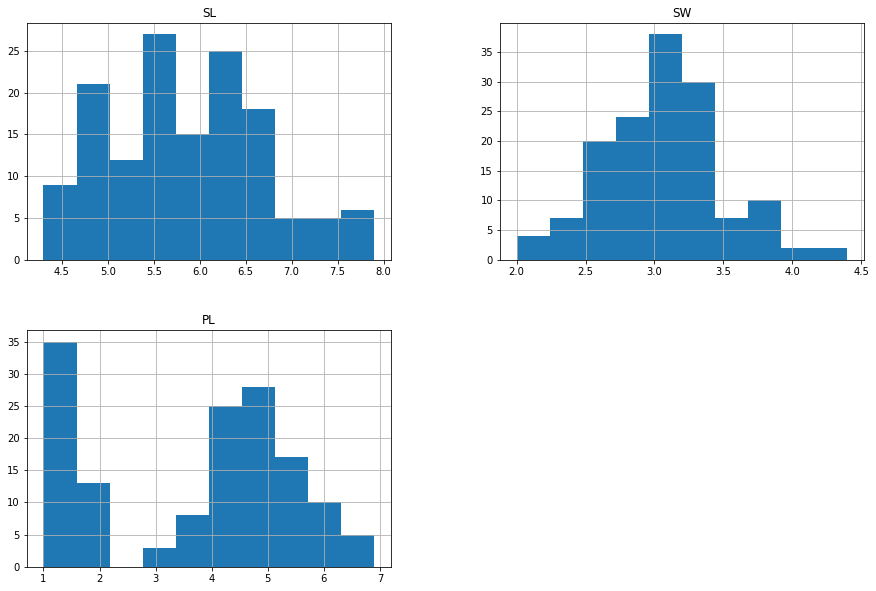

In [61]:
fg=data[["SL","SW","PL"]]
fg.hist(figsize=(15,10))
plt.show()

In [62]:
data["SL"]=data["SL"].fillna(data["SL"].median())
data["SW"]=data["SW"].fillna(data["SW"].median())
data["PL"]=data["PL"].fillna(data["PL"].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [63]:
x= data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [64]:
data= pd.get_dummies(data)
data.head(3)

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0


In [65]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,train_size=0.2)
x_train.shape

(30, 4)

In [66]:
#building model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))
print("confusion_matrix : ",confusion_matrix(y_test,y_pred))



f1_score :  0.9333108412055781
confusion_matrix :  [[43  0  0]
 [ 0 34  5]
 [ 0  3 35]]


In [67]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))
print("confusion_matrix : ",confusion_matrix(y_test,y_pred))


f1_score :  0.9421080150510531
confusion_matrix :  [[41  2  0]
 [ 0 36  3]
 [ 0  2 36]]
